In [21]:
import pandas as pd
import numpy as np

data_mat = pd.read_csv('student-mat.csv')
data_por = pd.read_csv('student-por.csv')

In [22]:
data_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [23]:
data = pd.concat([data_mat, data_por], axis=0, ignore_index=True)

In [24]:
columns_to_identifying = ['school','sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
data = data.drop_duplicates(columns_to_identifying)

In [25]:
import plotly.express as px

fig = px.histogram(x=data['G3'],  labels={'x':'Final grade'})
fig.show()

In [26]:
fig = px.histogram(x=data['school'],  labels={'x':'School'})
fig.show()

In [27]:
fig = px.histogram(x=data['sex'],  labels={'x':'Sex'})
fig.show()

In [28]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,16.812689,2.492447,2.293051,1.564955,1.927492,0.332326,3.938066,3.184290,3.172205,1.504532,2.282477,3.531722,4.930514,10.728097,10.708459,10.725076
std,1.269194,1.130958,1.094027,0.742799,0.827405,0.716024,0.941930,1.060583,1.161907,0.926567,1.290121,1.434835,6.858060,3.082098,3.529588,4.106738
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,8.000000,9.000000,9.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Feature correlation

In [29]:
correlation_val = data.corr().abs()
correlation_val = correlation_val.unstack()
correlation_val = correlation_val.sort_values(ascending=False)
correlation_val = correlation_val.to_frame(name='correlation')

# Removing correlation with each other
correlation_val = correlation_val[~(correlation_val.index.get_level_values(0) == correlation_val.index.get_level_values(1))]

# Removing duplicate indexes
correlation_val = correlation_val.reset_index()
correlation_val['merged_index'] = correlation_val[['level_0', 'level_1']].min(axis=1) + "-" + correlation_val[['level_0', 'level_1']].max(axis=1)
correlation_val = correlation_val.drop(['level_0', 'level_1'], axis=1)
correlation_val = correlation_val.drop_duplicates(['merged_index'])
correlation_val

,correlation,merged_index
0,0.913548,G2-G3
2,0.841436,G1-G2
4,0.796569,G1-G3
6,0.635156,Fedu-Medu
8,0.618431,Dalc-Walc
10,0.404503,Walc-goout
12,0.368938,G1-failures
14,0.360881,G2-failures
16,0.359377,G3-failures
18,0.332688,freetime-goout


In [30]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=correlation_val['merged_index'], y=correlation_val['correlation'])])
fig.show()

### Predicting alcohol consumption

In [31]:
data['WeekAlc'] = data[['Dalc', 'Walc']].mean(axis=1)
data = data.drop(['Dalc', 'Walc'], axis=1)

In [32]:
data.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
health          int64
absences        int64
G1              int64
G2              int64
G3              int64
WeekAlc       float64
dtype: object

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='unknown')), 
                                  ('onehot', OneHotEncoder(handle_unknown='ignore'))])
categorical_features = data.select_dtypes(include='object').columns


numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='median')), 
                                  ('scaler', StandardScaler())])
numeric_features = data.select_dtypes(include='int64').columns

In [34]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [35]:
from sklearn.model_selection import train_test_split

X = data.drop(['WeekAlc'], axis=1)
y = data['WeekAlc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from collections import Counter

Counter(y)

Counter({1.0: 250,
         2.5: 76,
         1.5: 112,
         2.0: 100,
         3.0: 53,
         5.0: 15,
         3.5: 32,
         4.0: 17,
         4.5: 7})

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

classifiers = [linear_model.LinearRegression()]

In [46]:
pipe.named_steps['preprocessor'].fit_transform(X_train, y_train)[0]

array([-0.69255131,  1.37207735,  0.68985822,  0.54690909, -1.09522446,
       -0.45894682, -0.98418504, -0.1666581 , -0.16060525,  0.3209388 ,
       -0.45450264,  0.07814357,  1.18568258,  1.02257039,  1.        ,
        0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        1.        ,  0.        ])

[7.41393602e-02 5.72011579e-02 5.77510933e-02 4.88882612e-02
 8.30884824e-02 2.61839537e-02 1.75707949e-01 4.35326815e-03
 3.67726860e-01 1.01334775e-01 1.54856951e-01 1.40142940e-01
 2.62774167e-02 6.95053137e-02 1.58457585e+12 1.58457585e+12
 1.62609654e+11 1.62609654e+11 1.73896624e+12 1.73896624e+12
 1.98657568e+12 1.98657568e+12 1.26698665e+12 1.26698665e+12
 1.47613952e+12 1.47613952e+12 1.47613952e+12 1.47613952e+12
 1.47613952e+12 4.85512398e+11 4.85512398e+11 4.85512398e+11
 4.85512398e+11 4.85512398e+11 1.78600945e+12 1.78600945e+12
 1.78600945e+12 1.78600945e+12 1.79084311e+12 1.79084311e+12
 1.79084311e+12 1.88007080e+12 1.88007080e+12 3.33831407e+11
 3.33831407e+11 6.24854481e+11 6.24854481e+11 6.64636606e+11
 6.64636606e+11 7.99302950e+11 7.99302950e+11 6.30330405e+11
 6.30330405e+11 7.06824697e+11 7.06824697e+11 1.88629850e+11
 1.88629850e+11]


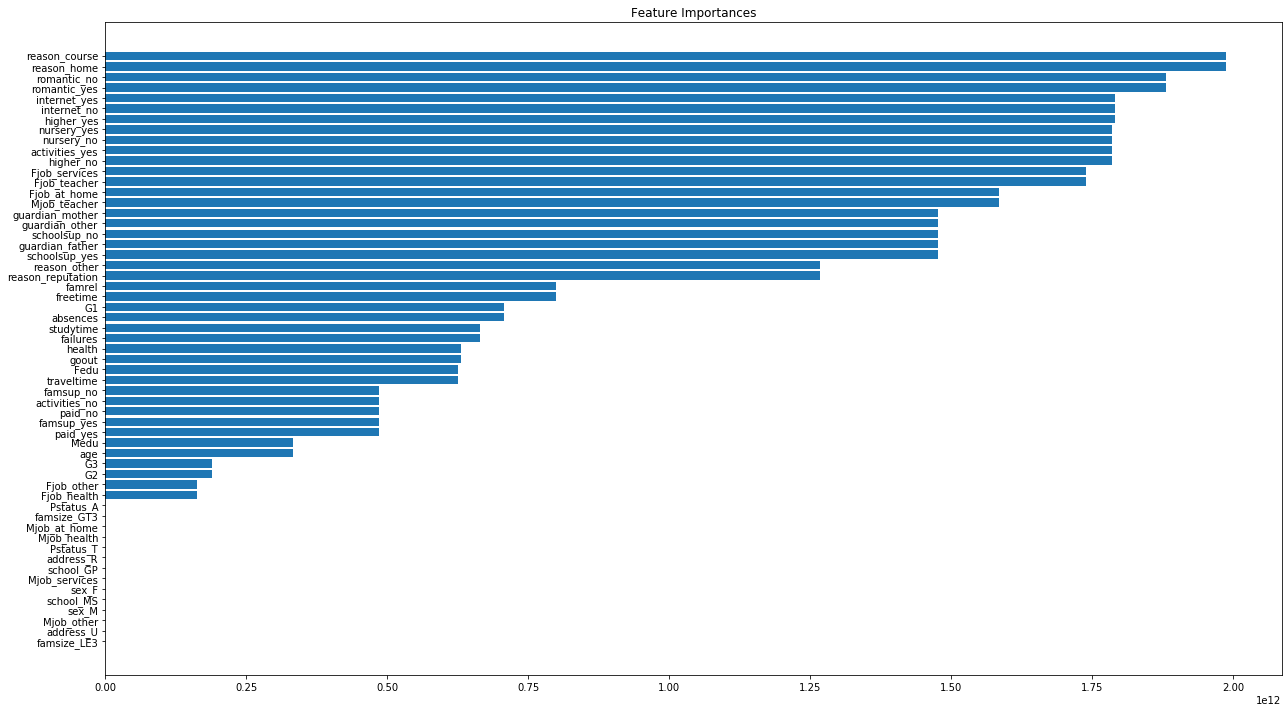

Mean squared error: 0.66
Mean squared error train: 0.64
Mean squared error stupid: 0.84
Coefficient of determination: 0.16


In [47]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, make_scorer, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict


for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    pipe = pipe.fit(X_train, y_train)
    
    one_hot_encoding = (pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'])
    feature_names = one_hot_encoding.get_feature_names(input_features=categorical_features)
    feature_names = np.r_[feature_names, numeric_features]

    feature_importances = abs(pipe.named_steps['classifier'].coef_)
    print(feature_importances)
    sorted_index = feature_importances.argsort()
    
    y_ticks = np.arange(0, len(feature_names))
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 10)
    ax.barh(y_ticks, feature_importances[sorted_index])
    ax.set_yticklabels(feature_names[sorted_index])
    ax.set_yticks(y_ticks)
    ax.set_title("Feature Importances")
    fig.tight_layout()
    plt.show()
    
    y_pred = pipe.predict(X_test)
    y_pred_train = pipe.predict(X_train)
    
    y_pred_stupid = y_test.copy()
    y_pred_stupid[:] = y_train.mean()
   
    
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred))

    print('Mean squared error train: %.2f'
          % mean_squared_error(y_train, y_pred_train))
    
    print('Mean squared error stupid: %.2f'
      % mean_squared_error(y_test, y_pred_stupid))

    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))

### Cross-validation

In [41]:
from sklearn.model_selection import cross_validate

cv_scores = []
scoring = {'mean_squared_error': make_scorer(mean_squared_error)}


for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    score = cross_validate(pipe, X, y, scoring=scoring)
    
    print(np.mean(score['test_mean_squared_error']))

0.770107013569187
